In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calculate_alpha_beta(mean, skewness):
    """
    Calculate alpha and beta parameters for a beta distribution
    based on mean and skewness parameters.
    
    Parameters:
    -----------
    mean : float
        Desired mean in [0,1]
    skewness : float
        Desired skewness parameter (beta - alpha)
        
    Returns:
    --------
    tuple
        (alpha, beta) parameters for scipy.stats.beta
    """
    # Calculate alpha using the formula derived
    alpha = (mean * skewness) / (1 - 2*mean)
    
    # Calculate beta
    beta = alpha + skewness
    
    return alpha, beta

def validate_parameters(mean, skewness):
    """
    Check if the given mean and skewness parameters can produce
    a valid beta distribution with alpha > 0 and beta > 1.
    
    Returns True if valid, False otherwise.
    """
    try:
        alpha, beta = calculate_alpha_beta(mean, skewness)
        return True
        # return alpha > 0 and beta >= 1
    except:
        return False

def plot_beta_distributions(combinations, x_range=(0, 1), num_points=1000, figsize=(12, 8)):
    """
    Plot beta distributions for different combinations of mean and skewness.
    
    Parameters:
    -----------
    combinations : list of tuples
        Each tuple contains (mean, skewness, label)
    x_range : tuple
        Range of x values to plot
    num_points : int
        Number of points to evaluate
    figsize : tuple
        Figure size
    """
    plt.figure(figsize=figsize)
    
    x = np.linspace(x_range[0], x_range[1], num_points)
    
    for mean, skewness, label in combinations:
        # Check if parameters are valid
        if not validate_parameters(mean, skewness):
            print(f"Invalid parameters: mean={mean}, skewness={skewness}")
            continue
        
        # Calculate alpha and beta
        alpha, beta = calculate_alpha_beta(mean, skewness)
        
        # Create beta distribution
        dist = stats.beta(alpha, beta)
        
        # Calculate PDF values
        y = dist.pdf(x)
        
        # Plot
        plt.plot(x, y, label=f"{label}: mean={mean:.2f}, s={skewness:.1f} (α={alpha:.2f}, β={beta:.2f})")
    
    plt.title("Beta Distributions with Different Mean and Skewness Parameters")
    plt.xlabel("Position (Z)")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(alpha=0.3)
    
    return plt

# Define combinations of mean and skewness to plot
combinations = [
    # Disadvantaged groups (lower mean)
    (0.2, 6.0, "Strongly disadvantaged"),
    (0.2, 3.0, "Moderately disadvantaged"),
    (0.3, 4.0, "Slightly disadvantaged"),
    
    # Middle groups
    (0.5, 2.0, "Middle"),
    
    # Advantaged groups (higher mean)
    (0.7, 2.0, "Moderately advantaged"),
    (0.7, 1.0, "Slightly advantaged"),
    (0.8, 1.0, "Strongly advantaged")
]

# Plot distributions
plot_beta_distributions(combinations)

# Show valid parameter ranges
print("Checking valid parameter ranges...")
means = np.linspace(0.05, 0.95, 19)
skewness_values = np.linspace(0.5, 10, 20)

valid_combinations = []
print("\nValid parameter combinations (sample):")
print("Mean | Skewness | Alpha | Beta")
print("-" * 40)

for mean in means:
    for skewness in skewness_values:
        if validate_parameters(mean, skewness):
            alpha, beta = calculate_alpha_beta(mean, skewness)
            valid_combinations.append((mean, skewness, alpha, beta))
            
            # Print some samples for reference
            if len(valid_combinations) % 20 == 0:
                print(f"{mean:.2f} | {skewness:.2f} | {alpha:.2f} | {beta:.2f}")

print(f"\nTotal valid combinations: {len(valid_combinations)} out of {len(means) * len(skewness_values)}")

# Plot distributions for different means with fixed skewness
means_to_plot = [(0.1, "Very low"), (0.3, "Low"), (0.5, "Medium"), (0.7, "High"), (0.9, "Very high")]
fixed_skewness = 2.0

plt.figure(figsize=(12, 6))
for mean, label in means_to_plot:
    if validate_parameters(mean, fixed_skewness):
        alpha, beta = calculate_alpha_beta(mean, fixed_skewness)
        x = np.linspace(0, 1, 1000)
        y = stats.beta(alpha, beta).pdf(x)
        plt.plot(x, y, label=f"{label}: mean={mean:.2f}, s={fixed_skewness:.1f}")

plt.title(f"Beta Distributions with Fixed Skewness (s={fixed_skewness}) and Varying Means")
plt.xlabel("Position (Z)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)

# Plot distributions for different skewness with fixed mean
skewness_to_plot = [(1.0, "Very low"), (2.0, "Low"), (4.0, "Medium"), (6.0, "High"), (8.0, "Very high")]
fixed_mean = 0.3

plt.figure(figsize=(12, 6))
for skewness, label in skewness_to_plot:
    if validate_parameters(fixed_mean, skewness):
        alpha, beta = calculate_alpha_beta(fixed_mean, skewness)
        x = np.linspace(0, 1, 1000)
        y = stats.beta(alpha, beta).pdf(x)
        plt.plot(x, y, label=f"{label}: mean={fixed_mean:.2f}, s={skewness:.1f}")

plt.title(f"Beta Distributions with Fixed Mean (m={fixed_mean}) and Varying Skewness")
plt.xlabel("Position (Z)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)

# Show what happens at extreme values of mean
extreme_combinations = [
    (0.1, 1.0, "Very low mean"),
    (0.25, 2.0, "Low mean"),
    (0.45, 0.8, "Medium mean"),
    (0.49, 0.5, "High mean (approaching limit)"),
    (0.70, 0.5, "test"),
]

plt.figure(figsize=(12, 6))
for mean, skewness, label in extreme_combinations:
    if validate_parameters(mean, skewness):
        alpha, beta = calculate_alpha_beta(mean, skewness)
        x = np.linspace(0, 1, 1000)
        y = stats.beta(alpha, beta).pdf(x)
        plt.plot(x, y, label=f"{label}: mean={mean:.2f}, s={skewness:.1f} (α={alpha:.2f}, β={beta:.2f})")

plt.title("Beta Distributions Showing Behavior Near Parameter Limits")
plt.xlabel("Position (Z)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)

In [ ]:
lognormal_params_for_target_mean(target_mean=0.2, target_std=0.01)

In [ ]:
# Let's use matplotlib for interactive plotting instead of plotly
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, Layout, VBox, HBox
from matplotlib.figure import Figure

def plot_beta_distributions(mean1=0.3, mean2=0.2):
    # Define multiple skewness values to display
    skewness_values = [2.0, 4.0, 6.0, 8.0]
    
    # Create a figure with subplots for each skewness value
    fig, axes = plt.subplots(len(skewness_values), 1, figsize=(10, 15), sharex=True, sharey=True)
    
    # Plot for each skewness value
    for i, skewness in enumerate(skewness_values):
        ax = axes[i]
        x = np.linspace(0, 1, 1000)
        
        # Plot for the first mean if parameters are valid
        if validate_parameters(mean1, skewness):
            alpha1, beta1 = calculate_alpha_beta(mean1, skewness)
            y1 = stats.beta(alpha1, beta1).pdf(x)
            ax.plot(x, y1, label=f'Group 1: mean={mean1:.2f}, s={skewness:.1f} (α={alpha1:.2f}, β={beta1:.2f})')
        
        # Plot for the second mean if parameters are valid
        if validate_parameters(mean2, skewness):
            alpha2, beta2 = calculate_alpha_beta(mean2, skewness)
            y2 = stats.beta(alpha2, beta2).pdf(x)
            ax.plot(x, y2, label=f'Group 2: mean={mean2:.2f}, s={skewness:.1f} (α={alpha2:.2f}, β={beta2:.2f})')
        
        ax.set_title(f"Beta Distributions with Skewness={skewness}")
        ax.set_ylabel("Probability Density")
        ax.grid(alpha=0.3)
        ax.legend()
    
    # Set the x-label only for the bottom subplot
    axes[-1].set_xlabel("Position (Z)")
    
    plt.tight_layout()
    return fig

# Create interactive widget with two mean sliders
interactive_plot = interactive(
    plot_beta_distributions,
    mean1=FloatSlider(min=0.05, max=1, step=0.01, value=0.3, description='Mean 1:'),
    mean2=FloatSlider(min=0.05, max=1, step=0.01, value=0.2, description='Mean 2:')
)

# Display the interactive plot
interactive_plot

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, IntSlider, Layout, VBox, HBox, Output

def incarceration_rate(max_rate, z, gamma):
    """Calculate incarceration rate based on position and shape parameter"""
    position_effect = (1 - z) ** gamma
    return max_rate * position_effect

def plot_incarceration_function(max_rate=500, gamma=1.0):
    # Create position values
    z = np.linspace(0, 1, 1000)
    
    # Calculate rates
    rates = incarceration_rate(max_rate, z, gamma)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot incarceration rate
    ax.plot(z, rates, 'b-', linewidth=3, label='Incarceration Rate')
    
    # Add labels and title
    ax.set_xlabel('Position (z)')
    ax.set_ylabel('Incarceration Rate (per 100,000)')
    ax.set_title(f'Incarceration Rate Function: max_rate={max_rate}, γ={gamma}')
    
    # Add formula annotation
    ax.text(0.5, max_rate * 0.9, f"IncarcerationRate = {max_rate} × (1-z)^{gamma}", 
            horizontalalignment='center', fontsize=14)
    
    # Add grid and legend
    ax.grid(alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    return fig

# Create interactive widget
max_rate_slider = IntSlider(
    min=100, 
    max=1000, 
    step=50, 
    value=500, 
    description='Max Rate:',
    style={'description_width': 'initial'}
)

gamma_slider = FloatSlider(
    min=0, 
    max=50.0, 
    step=0.1, 
    value=1.0, 
    description='γ (gamma):',
    style={'description_width': 'initial'}
)

# Create the interactive plot
interactive_plot = interactive(
    plot_incarceration_function,
    max_rate=max_rate_slider,
    gamma=gamma_slider
)

# Display the interactive plot
display(VBox([
    HBox([max_rate_slider, gamma_slider]),
    interactive_plot.children[-1]
]))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def generate_scaled_lognormal(mu, sigma, size=50000):
    """Generate lognormal samples and scale to [0,1]"""
    samples = stats.lognorm.rvs(s=sigma, scale=np.exp(mu), size=size)
    
    # Use quantiles for more stable scaling
    q_low = np.quantile(samples, 0.001)  # 0.1% quantile
    q_high = np.quantile(samples, 0.999) # 99.9% quantile
    
    # Scale to [0,1]
    scaled = (samples - q_low) / (q_high - q_low)
    scaled = np.clip(scaled, 0, 1)
    
    return scaled

def calculate_stats(samples):
    """Calculate mean and standard deviation of samples"""
    return np.mean(samples), np.std(samples)

def plot_lognormal_distributions(mu1=-0.5, sigma1=0.8, mu2=0.5, sigma2=0.8):
    """
    Plot scaled lognormal distributions with different parameters
    for comparison between two groups
    """
    # Define multiple combinations to display
    fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)
    
    # First row: Vary mu1, keep other parameters fixed
    ax = axes[0]
    x = np.linspace(0, 1, 1000)
    mu_values = [mu1-0.5, mu1, mu1+0.5, mu1+1.0]
    
    for mu in mu_values:
        # Generate samples
        samples = generate_scaled_lognormal(mu, sigma1)
        mean, std = calculate_stats(samples)
        
        # Calculate KDE for smooth plotting
        kde = stats.gaussian_kde(samples)
        y = kde(x)
        
        # Plot
        ax.plot(x, y, label=f'mu={mu:.1f}, sigma={sigma1:.1f} → mean={mean:.3f}, std={std:.3f}')
    
    ax.set_title("Effect of changing mu (group 1)")
    ax.set_ylabel("Density")
    ax.grid(alpha=0.3)
    ax.legend()
    
    # Second row: Vary sigma1, keep other parameters fixed
    ax = axes[1]
    sigma_values = [0.3, 0.6, 0.9, 1.2]
    
    for sigma in sigma_values:
        # Generate samples
        samples = generate_scaled_lognormal(mu1, sigma)
        mean, std = calculate_stats(samples)
        
        # Calculate KDE for smooth plotting
        kde = stats.gaussian_kde(samples)
        y = kde(x)
        
        # Plot
        ax.plot(x, y, label=f'mu={mu1:.1f}, sigma={sigma:.1f} → mean={mean:.3f}, std={std:.3f}')
    
    ax.set_title("Effect of changing sigma (group 1)")
    ax.set_ylabel("Density")
    ax.grid(alpha=0.3)
    ax.legend()
    
    # Third row: Vary mu2, keep other parameters fixed
    ax = axes[2]
    mu_values = [mu2-0.5, mu2, mu2+0.5, mu2+1.0]
    
    for mu in mu_values:
        # Generate samples
        samples = generate_scaled_lognormal(mu, sigma2)
        mean, std = calculate_stats(samples)
        
        # Calculate KDE for smooth plotting
        kde = stats.gaussian_kde(samples)
        y = kde(x)
        
        # Plot
        ax.plot(x, y, label=f'mu={mu:.1f}, sigma={sigma2:.1f} → mean={mean:.3f}, std={std:.3f}')
    
    ax.set_title("Effect of changing mu (group 2)")
    ax.set_ylabel("Density")
    ax.grid(alpha=0.3)
    ax.legend()
    
    # Fourth row: Compare the two groups with current parameters
    ax = axes[3]
    
    # Group 1
    samples1 = generate_scaled_lognormal(mu1, sigma1)
    mean1, std1 = calculate_stats(samples1)
    kde1 = stats.gaussian_kde(samples1)
    y1 = kde1(x)
    ax.plot(x, y1, label=f'Group 1: mu={mu1:.1f}, sigma={sigma1:.1f} → mean={mean1:.3f}, std={std1:.3f}')
    
    # Group 2
    samples2 = generate_scaled_lognormal(mu2, sigma2)
    mean2, std2 = calculate_stats(samples2)
    kde2 = stats.gaussian_kde(samples2)
    y2 = kde2(x)
    ax.plot(x, y2, label=f'Group 2: mu={mu2:.1f}, sigma={sigma2:.1f} → mean={mean2:.3f}, std={std2:.3f}')
    
    ax.set_title("Comparison of the two groups")
    ax.set_xlabel("Position (Z)")
    ax.set_ylabel("Density")
    ax.grid(alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    return fig

# Generate a lookup table of parameter combinations and their resulting stats
def generate_lookup_table(mu_range=(-2, 2), sigma_range=(0.1, 2.0), steps=10):
    """Generate a lookup table of parameter combinations and their resulting statistics."""
    mu_values = np.linspace(mu_range[0], mu_range[1], steps)
    sigma_values = np.linspace(sigma_range[0], sigma_range[1], steps)
    
    lookup_table = []
    
    for mu in mu_values:
        for sigma in sigma_values:
            # Generate samples
            samples = generate_scaled_lognormal(mu, sigma)
            
            # Calculate statistics
            mean, std = calculate_stats(samples)
            
            # Add to lookup table
            lookup_table.append((mu, sigma, mean, std))
    
    return lookup_table

# Function to find closest parameters for target mean and std
def find_closest_params(target_mean, target_std, lookup_table):
    """Find the closest parameter combination for a target mean and std."""
    best_error = float('inf')
    best_params = None
    
    for mu, sigma, mean, std in lookup_table:
        error = (mean - target_mean)**2 + (std - target_std)**2
        if error < best_error:
            best_error = error
            best_params = (mu, sigma, mean, std, error)
    
    return best_params

# Generate the lookup table
lookup_table = generate_lookup_table(steps=15)

# Print sample parameter combinations and resulting statistics
print("Sample Parameter Combinations for Lognormal Distribution")
print("=" * 80)
print("Target Mean | Target StdDev | μ | σ | Actual Mean | Actual StdDev | Error")
print("-" * 80)

# Example target statistics
example_targets = [
    (0.1, 0.05),  # Very disadvantaged, low variance
    (0.2, 0.1),   # Disadvantaged, medium variance
    (0.3, 0.15),  # Moderately disadvantaged
    (0.5, 0.2),   # Middle position, high variance
    (0.7, 0.15),  # Advantaged, medium variance
    (0.8, 0.1),   # Highly advantaged, low variance
]

for target_mean, target_std in example_targets:
    # Find closest parameters
    mu, sigma, actual_mean, actual_std, error = find_closest_params(target_mean, target_std, lookup_table)
    print(f"{target_mean:.2f} | {target_std:.2f} | {mu:.4f} | {sigma:.4f} | {actual_mean:.4f} | {actual_std:.4f} | {error:.6f}")

# Plot example distributions
plot_lognormal_distributions(mu1=-0.5, sigma1=0.8, mu2=0.5, sigma2=0.8)

# Plot another set with different parameters
fig2 = plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, 1000)

# Plot various target distributions
for target_mean, target_std in example_targets:
    # Find closest parameters
    mu, sigma, actual_mean, actual_std, error = find_closest_params(target_mean, target_std, lookup_table)
    
    # Generate samples
    samples = generate_scaled_lognormal(mu, sigma)
    
    # Calculate KDE for smooth plotting
    kde = stats.gaussian_kde(samples)
    y = kde(x)
    
    # Plot
    plt.plot(x, y, label=f'mean={target_mean:.2f}, std={target_std:.2f} → μ={mu:.2f}, σ={sigma:.2f}')

plt.title("Scaled Lognormal Distributions for Different Target Statistics")
plt.xlabel("Position (Z)")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Create tables of recommended parameter values
print("\nRecommended Parameter Values for Common Scenarios")
print("=" * 80)
print("Scenario | Target Mean | Target StdDev | μ | σ")
print("-" * 80)
print(f"Highly Disadvantaged | 0.10 | 0.05 | {find_closest_params(0.10, 0.05, lookup_table)[0]:.2f} | {find_closest_params(0.10, 0.05, lookup_table)[1]:.2f}")
print(f"Disadvantaged | 0.20 | 0.10 | {find_closest_params(0.20, 0.10, lookup_table)[0]:.2f} | {find_closest_params(0.20, 0.10, lookup_table)[1]:.2f}")
print(f"Slightly Disadvantaged | 0.30 | 0.15 | {find_closest_params(0.30, 0.15, lookup_table)[0]:.2f} | {find_closest_params(0.30, 0.15, lookup_table)[1]:.2f}")
print(f"Middle | 0.50 | 0.20 | {find_closest_params(0.50, 0.20, lookup_table)[0]:.2f} | {find_closest_params(0.50, 0.20, lookup_table)[1]:.2f}")
print(f"Advantaged | 0.70 | 0.15 | {find_closest_params(0.70, 0.15, lookup_table)[0]:.2f} | {find_closest_params(0.70, 0.15, lookup_table)[1]:.2f}")
print(f"Highly Advantaged | 0.80 | 0.10 | {find_closest_params(0.9, 0.01, lookup_table)[0]:.2f} | {find_closest_params(0.80, 0.10, lookup_table)[1]:.2f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def beta_params_from_mean_var(mean, variance):
    """
    Calculate alpha and beta parameters for a beta distribution
    based on the mean and variance.
    
    Parameters:
    -----------
    mean : float
        Desired mean in (0,1)
    variance : float
        Desired variance in (0, mean*(1-mean))
        
    Returns:
    --------
    tuple
        (alpha, beta) parameters for scipy.stats.beta
    """
    # Check if variance is valid for the given mean
    max_var = mean * (1 - mean)
    if variance >= max_var:
        raise ValueError(f"Variance too large for mean={mean}. Maximum possible variance is {max_var}")
    
    # Calculate the common term
    common_term = (mean * (1 - mean) / variance) - 1
    
    # Calculate alpha and beta
    alpha = mean * common_term
    beta = (1 - mean) * common_term
    
    return alpha, beta

def get_skewness(alpha, beta):
    """Calculate the skewness of a beta distribution."""
    numerator = 2 * (beta - alpha) * np.sqrt(alpha + beta + 1)
    denominator = (alpha + beta + 2) * np.sqrt(alpha * beta)
    return numerator / denominator

def plot_beta_distributions_mean_var(combinations, x_range=(0, 1), num_points=1000, figsize=(12, 8)):
    """
    Plot beta distributions for different combinations of mean and variance.
    
    Parameters:
    -----------
    combinations : list of tuples
        Each tuple contains (mean, variance, label)
    x_range : tuple
        Range of x values to plot
    num_points : int
        Number of points to evaluate
    figsize : tuple
        Figure size
    """
    plt.figure(figsize=figsize)
    
    x = np.linspace(x_range[0], x_range[1], num_points)
    
    for mean, variance, label in combinations:
        try:
            # Calculate alpha and beta
            alpha, beta = beta_params_from_mean_var(mean, variance)
            
            # Calculate skewness for labeling
            skewness = get_skewness(alpha, beta)
            
            # Create beta distribution
            dist = stats.beta(alpha, beta)
            
            # Calculate PDF values
            y = dist.pdf(x)
            
            # Determine skewness direction for labeling
            skew_direction = "right-skewed" if alpha < beta else "left-skewed" if alpha > beta else "symmetric"
            
            # Plot
            plt.plot(x, y, label=f"{label}: mean={mean:.2f}, var={variance:.4f} "
                               f"(α={alpha:.2f}, β={beta:.2f}, {skew_direction})")
        
        except ValueError as e:
            print(f"Error with {label}: {e}")
    
    plt.title("Beta Distributions with Mean-Variance Parameterization")
    plt.xlabel("Position (Z)")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(alpha=0.3)
    
    return plt

# Create visualizations showing the effects of varying mean and variance
# First, create a grid of plots showing different means with fixed variance
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Fixed variance values for each row
variance_values = [0.01, 0.03, 0.05]
mean_values = [0.2, 0.35, 0.5, 0.65, 0.8]

for i, mean in enumerate(mean_values):
    ax = axes[i]
    x = np.linspace(0, 1, 1000)
    
    for variance in variance_values:
        try:
            # Calculate alpha and beta
            alpha, beta = beta_params_from_mean_var(mean, variance)
            
            # Create beta distribution
            dist = stats.beta(alpha, beta)
            
            # Calculate PDF values
            y = dist.pdf(x)
            
            # Determine skewness direction for labeling
            skew_direction = "right-skewed" if alpha < beta else "left-skewed" if alpha > beta else "symmetric"
            
            # Plot
            ax.plot(x, y, label=f"var={variance:.4f} (α={alpha:.1f}, β={beta:.1f})")
            
        except ValueError as e:
            print(f"Error with mean={mean}, var={variance}: {e}")
    
    ax.set_title(f"Mean = {mean}")
    ax.grid(alpha=0.3)
    ax.legend()
    
    # Add skewness direction as text annotation
    try:
        alpha, beta = beta_params_from_mean_var(mean, variance_values[0])
        skew_direction = "Right-skewed" if alpha < beta else "Left-skewed" if alpha > beta else "Symmetric"
        ax.text(0.5, 0.9, skew_direction, transform=ax.transAxes, 
                horizontalalignment='center', color='red', fontsize=12)
    except:
        pass

# Add common labels
fig.text(0.5, 0.01, 'Position (Z)', ha='center', fontsize=14)
fig.text(0.01, 0.5, 'Probability Density', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Beta Distributions with Different Means and Fixed Variances', fontsize=16)
plt.tight_layout(rect=[0.02, 0.03, 1, 0.95])

# Now, create a grid showing fixed mean with different variances
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10), sharex=True)
axes2 = axes2.flatten()

# Fixed mean values for each subplot
fixed_means = [0.2, 0.4, 0.5, 0.6, 0.8]

for i, mean in enumerate(fixed_means):
    ax = axes2[i]
    x = np.linspace(0, 1, 1000)
    
    # Calculate maximum variance for this mean
    max_var = mean * (1 - mean)
    variance_values = np.linspace(max_var * 0.01, max_var * 0.9, 4)
    
    for variance in variance_values:
        try:
            # Calculate alpha and beta
            alpha, beta = beta_params_from_mean_var(mean, variance)
            
            # Create beta distribution
            dist = stats.beta(alpha, beta)
            
            # Calculate PDF values
            y = dist.pdf(x)
            
            # Plot
            ax.plot(x, y, label=f"var={variance:.4f} (α={alpha:.1f}, β={beta:.1f})")
            
        except ValueError as e:
            print(f"Error with mean={mean}, var={variance}: {e}")
    
    ax.set_title(f"Mean = {mean}, Maximum Variance = {max_var:.4f}")
    ax.grid(alpha=0.3)
    ax.legend()
    
    # Add skewness direction as text annotation
    try:
        alpha, beta = beta_params_from_mean_var(mean, variance_values[0])
        skew_direction = "Right-skewed" if alpha < beta else "Left-skewed" if alpha > beta else "Symmetric"
        ax.text(0.5, 0.9, skew_direction, transform=ax.transAxes, 
                horizontalalignment='center', color='red', fontsize=12)
    except:
        pass

# Add common labels
fig2.text(0.5, 0.01, 'Position (Z)', ha='center', fontsize=14)
fig2.text(0.01, 0.5, 'Probability Density', va='center', rotation='vertical', fontsize=14)
fig2.suptitle('Beta Distributions with Fixed Means and Different Variances', fontsize=16)
plt.tight_layout(rect=[0.02, 0.03, 1, 0.95])

# Create a comparison of distributions with same mean but different variance
plt.figure(figsize=(12, 6))
mean = 0.3
x = np.linspace(0, 1, 1000)

max_var = mean * (1 - mean)
variance_values = [max_var * 0.05, max_var * 0.2, max_var * 0.5, max_var * 0.8]

for variance in variance_values:
    alpha, beta = beta_params_from_mean_var(mean, variance)
    y = stats.beta.pdf(x, alpha, beta)
    
    plt.plot(x, y, label=f"var={variance:.4f} (α={alpha:.2f}, β={beta:.2f})")

plt.title(f"Right-Skewed Beta Distributions with Mean={mean} and Different Variances")
plt.xlabel("Position (Z)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)

# Create a comparison of distributions with same mean but different variance - for mean > 0.5
plt.figure(figsize=(12, 6))
mean = 0.7
x = np.linspace(0, 1, 1000)

max_var = mean * (1 - mean)
variance_values = [max_var * 0.05, max_var * 0.2, max_var * 0.5, max_var * 0.8]

for variance in variance_values:
    alpha, beta = beta_params_from_mean_var(mean, variance)
    y = stats.beta.pdf(x, alpha, beta)
    
    plt.plot(x, y, label=f"var={variance:.4f} (α={alpha:.2f}, β={beta:.2f})")

plt.title(f"Left-Skewed Beta Distributions with Mean={mean} and Different Variances")
plt.xlabel("Position (Z)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)

# Create a table of parameter values for reference
print("Reference Table for Beta Distribution Parameters")
print("=" * 80)
print("Mean | Variance | Alpha | Beta | Skew Direction")
print("-" * 80)

for mean in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    max_var = mean * (1 - mean)
    # Try different fractions of the maximum variance
    for fraction in [0.05, 0.2, 0.5]:
        variance = max_var * fraction
        alpha, beta = beta_params_from_mean_var(mean, variance)
        skewness = get_skewness(alpha, beta)
        skew_direction = "Right" if alpha < beta else "Left" if alpha > beta else "None"
        print(f"{mean:.1f} | {variance:.4f} | {alpha:.2f} | {beta:.2f} | {skew_direction}")

# Add a plot showing skewness transition
plt.figure(figsize=(12, 6))
means = np.linspace(0.05, 0.95, 100)
x = np.linspace(0, 1, 1000)

# Fixed fraction of maximum variance
fraction = 0.2

for mean in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    max_var = mean * (1 - mean)
    variance = max_var * fraction
    alpha, beta = beta_params_from_mean_var(mean, variance)
    y = stats.beta.pdf(x, alpha, beta)
    
    skew_direction = "right-skewed" if alpha < beta else "left-skewed" if alpha > beta else "symmetric"
    plt.plot(x, y, label=f"mean={mean:.1f}, var={variance:.4f} ({skew_direction})")

plt.title(f"Beta Distributions with Different Means and Fixed Variance Fraction ({fraction})")
plt.xlabel("Position (Z)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)

Reference Table for Beta Distribution Parameters (Concentration Approach)
Mean | Concentration | Alpha | Beta | Variance | Skew Direction
--------------------------------------------------------------------------------
0.1 | 2.0 | 0.20 | 1.80 | 0.030000 | Right
0.1 | 5.0 | 0.50 | 4.50 | 0.015000 | Right
0.1 | 10.0 | 1.00 | 9.00 | 0.008182 | Right
0.1 | 20.0 | 2.00 | 18.00 | 0.004286 | Right
0.1 | 50.0 | 5.00 | 45.00 | 0.001765 | Right
0.2 | 2.0 | 0.40 | 1.60 | 0.053333 | Right
0.2 | 5.0 | 1.00 | 4.00 | 0.026667 | Right
0.2 | 10.0 | 2.00 | 8.00 | 0.014545 | Right
0.2 | 20.0 | 4.00 | 16.00 | 0.007619 | Right
0.2 | 50.0 | 10.00 | 40.00 | 0.003137 | Right
0.3 | 2.0 | 0.60 | 1.40 | 0.070000 | Right
0.3 | 5.0 | 1.50 | 3.50 | 0.035000 | Right
0.3 | 10.0 | 3.00 | 7.00 | 0.019091 | Right
0.3 | 20.0 | 6.00 | 14.00 | 0.010000 | Right
0.3 | 50.0 | 15.00 | 35.00 | 0.004118 | Right
0.4 | 2.0 | 0.80 | 1.20 | 0.080000 | Right
0.4 | 5.0 | 2.00 | 3.00 | 0.040000 | Right
0.4 | 10.0 | 4.00 | 6.00 | 0.0218

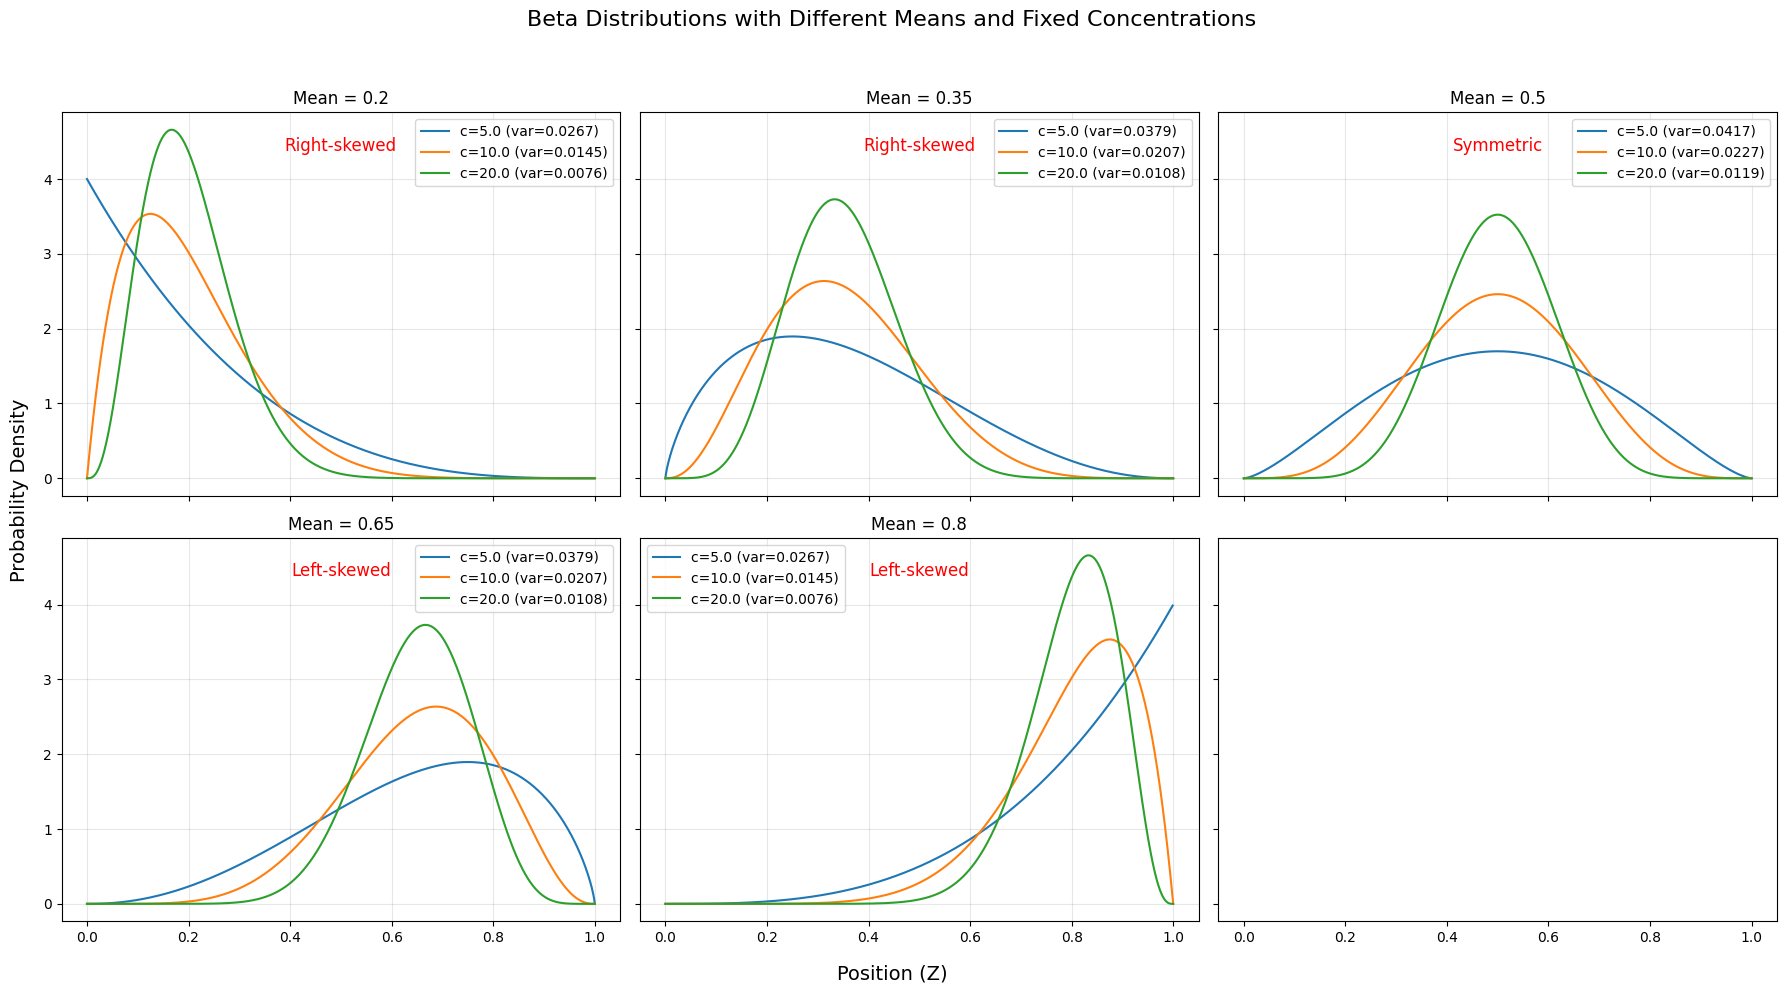

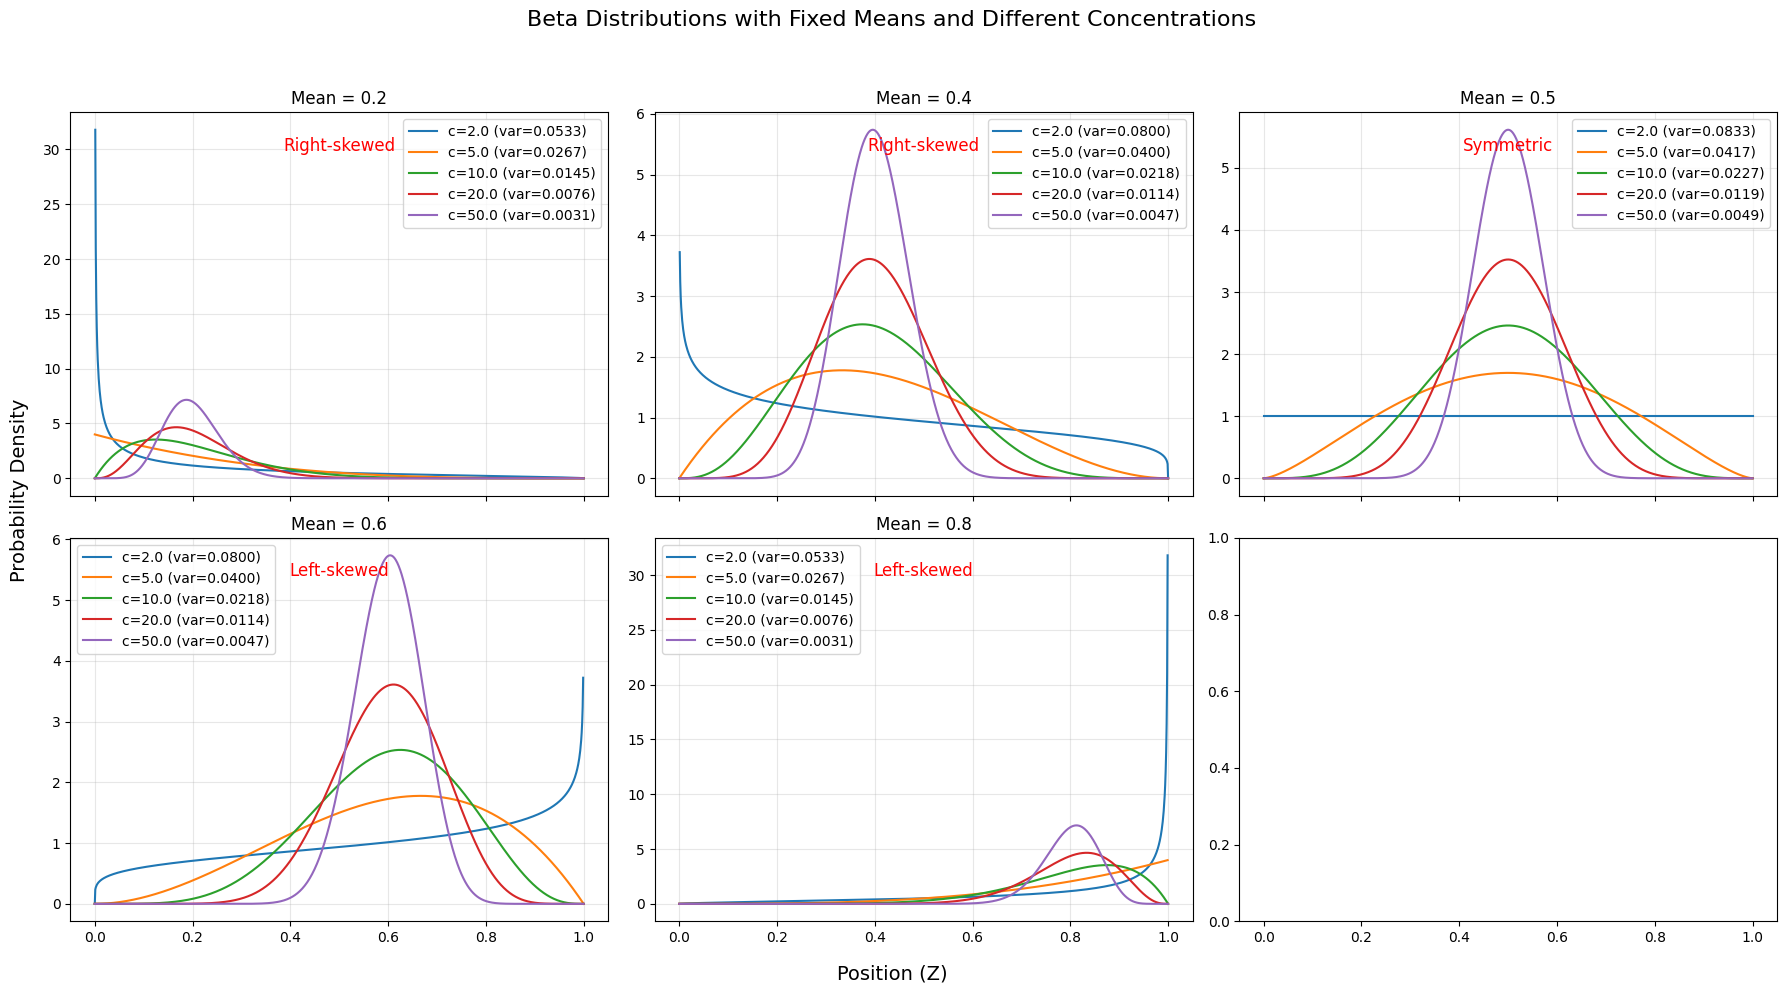

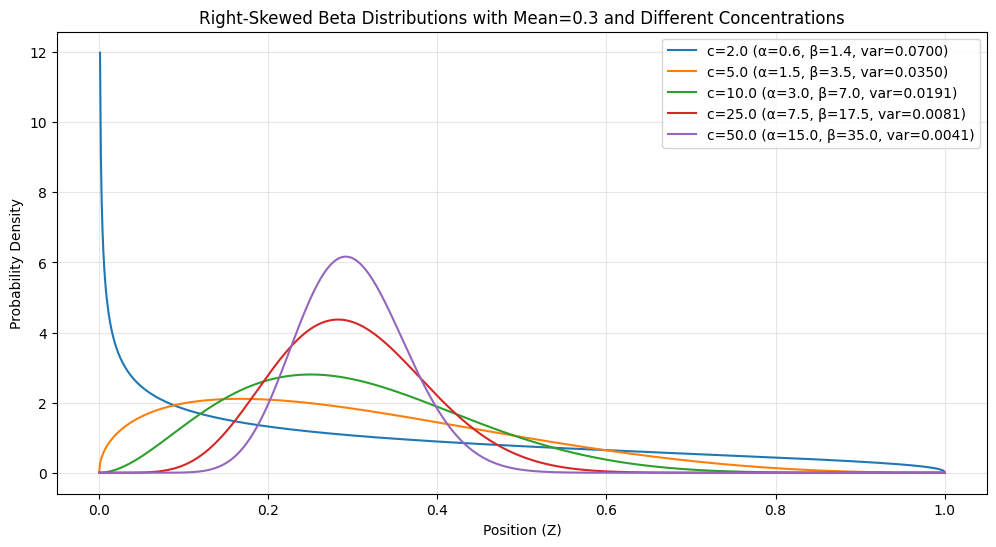

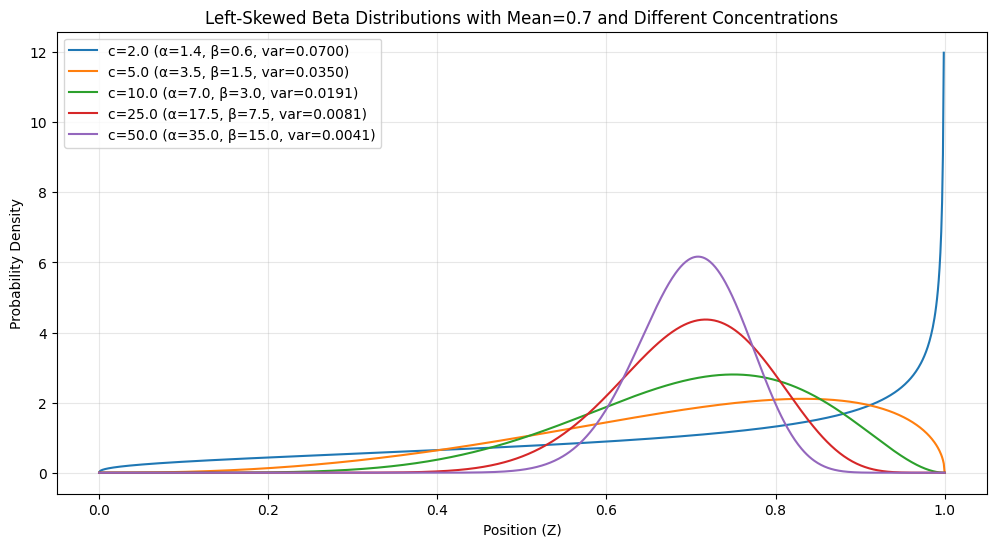

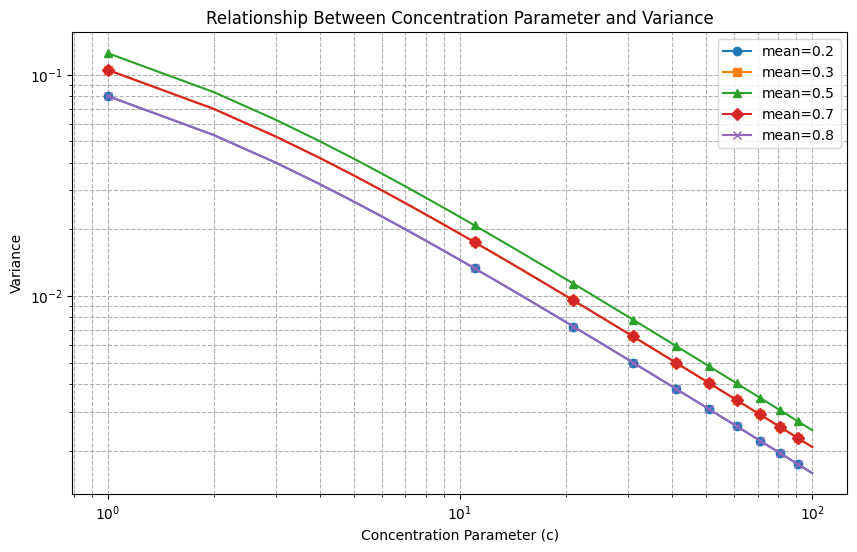

<Figure size 1600x600 with 0 Axes>

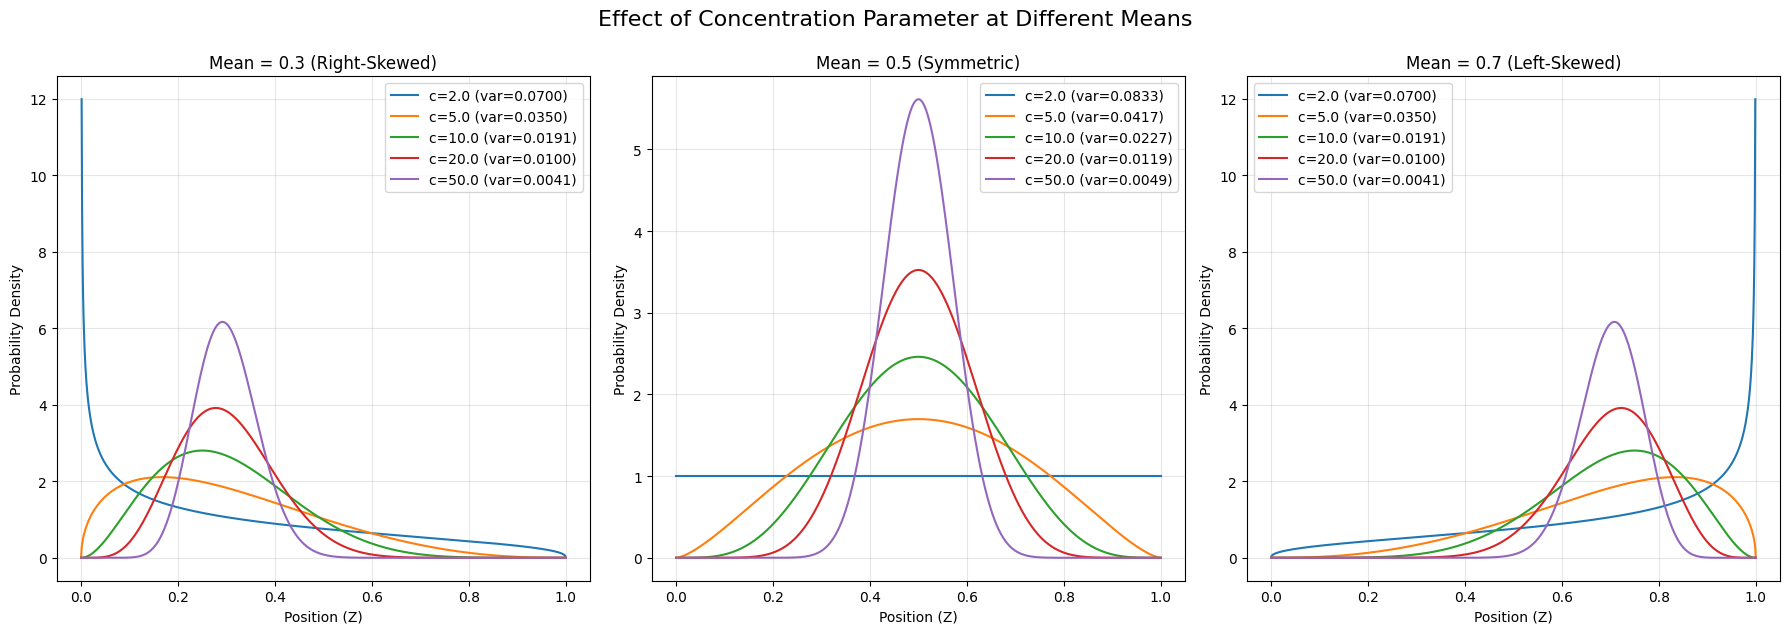

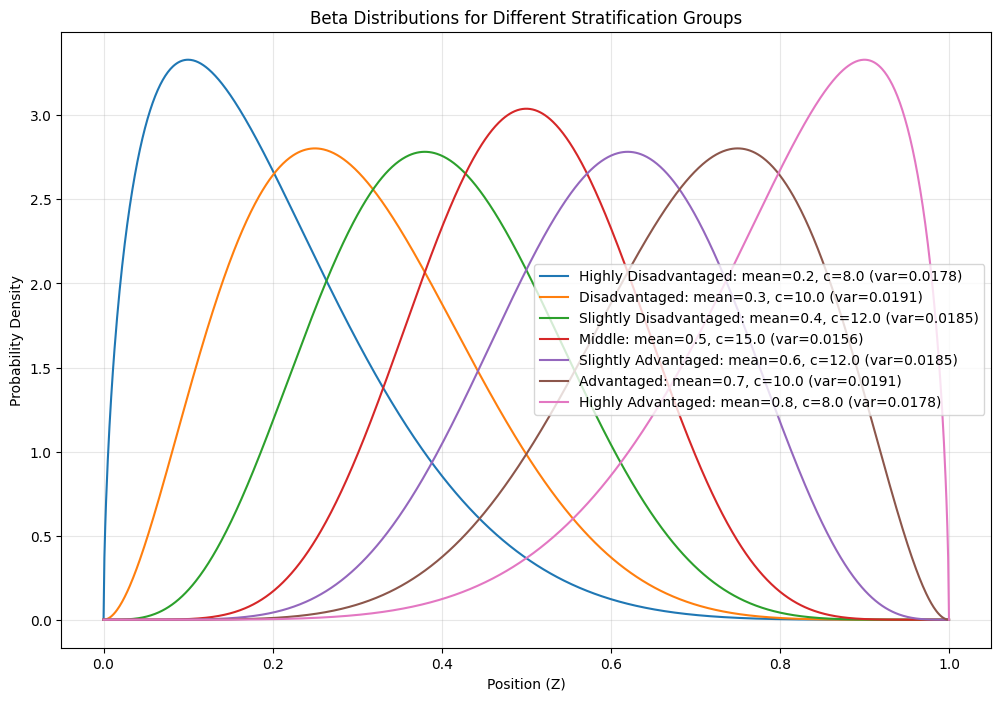

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def beta_params_from_mean_concentration(mean, concentration):
    """
    Calculate alpha and beta parameters for a beta distribution
    based on the mean and concentration parameter.
    
    Parameters:
    -----------
    mean : float
        Desired mean in (0,1)
    concentration : float
        Concentration parameter (α + β)
        Controls how concentrated the distribution is around its mean
        
    Returns:
    --------
    tuple
        (alpha, beta) parameters for scipy.stats.beta
    """
    # Calculate alpha and beta
    alpha = mean * concentration
    beta = (1 - mean) * concentration
    
    return alpha, beta

def calculate_variance(alpha, beta):
    """Calculate the variance of a beta distribution."""
    return (alpha * beta) / ((alpha + beta)**2 * (alpha + beta + 1))

def get_skewness(alpha, beta):
    """Calculate the skewness of a beta distribution."""
    numerator = 2 * (beta - alpha) * np.sqrt(alpha + beta + 1)
    denominator = (alpha + beta + 2) * np.sqrt(alpha * beta)
    return numerator / denominator

def plot_beta_distributions_concentration(combinations, x_range=(0, 1), num_points=1000, figsize=(12, 8)):
    """
    Plot beta distributions for different combinations of mean and concentration.
    
    Parameters:
    -----------
    combinations : list of tuples
        Each tuple contains (mean, concentration, label)
    x_range : tuple
        Range of x values to plot
    num_points : int
        Number of points to evaluate
    figsize : tuple
        Figure size
    """
    plt.figure(figsize=figsize)
    
    x = np.linspace(x_range[0], x_range[1], num_points)
    
    for mean, concentration, label in combinations:
        # Calculate alpha and beta
        alpha, beta = beta_params_from_mean_concentration(mean, concentration)
        
        # Calculate variance for labeling
        variance = calculate_variance(alpha, beta)
        
        # Create beta distribution
        dist = stats.beta(alpha, beta)
        
        # Calculate PDF values
        y = dist.pdf(x)
        
        # Determine skewness direction for labeling
        skew_direction = "right-skewed" if alpha < beta else "left-skewed" if alpha > beta else "symmetric"
        
        # Plot
        plt.plot(x, y, label=f"{label}: mean={mean:.2f}, c={concentration:.1f} "
                           f"(α={alpha:.2f}, β={beta:.2f}, var={variance:.4f}, {skew_direction})")
    
    plt.title("Beta Distributions with Mean-Concentration Parameterization")
    plt.xlabel("Position (Z)")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(alpha=0.3)
    
    return plt

# Create visualizations showing the effects of varying mean and concentration
# First, create a grid of plots showing different means with fixed concentration
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Fixed concentration values for each subplot
concentration_values = [5, 10, 20]
mean_values = [0.2, 0.35, 0.5, 0.65, 0.8]

for i, mean in enumerate(mean_values):
    ax = axes[i]
    x = np.linspace(0, 1, 1000)
    
    for concentration in concentration_values:
        # Calculate alpha and beta
        alpha, beta = beta_params_from_mean_concentration(mean, concentration)
        
        # Calculate variance for labeling
        variance = calculate_variance(alpha, beta)
        
        # Create beta distribution
        dist = stats.beta(alpha, beta)
        
        # Calculate PDF values
        y = dist.pdf(x)
        
        # Plot
        ax.plot(x, y, label=f"c={concentration:.1f} (var={variance:.4f})")
    
    ax.set_title(f"Mean = {mean}")
    ax.grid(alpha=0.3)
    ax.legend()
    
    # Add skewness direction as text annotation
    alpha, beta = beta_params_from_mean_concentration(mean, concentration_values[0])
    skew_direction = "Right-skewed" if alpha < beta else "Left-skewed" if alpha > beta else "Symmetric"
    ax.text(0.5, 0.9, skew_direction, transform=ax.transAxes, 
            horizontalalignment='center', color='red', fontsize=12)

# Add common labels
fig.text(0.5, 0.01, 'Position (Z)', ha='center', fontsize=14)
fig.text(0.01, 0.5, 'Probability Density', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Beta Distributions with Different Means and Fixed Concentrations', fontsize=16)
plt.tight_layout(rect=[0.02, 0.03, 1, 0.95])

# Now, create a grid showing fixed mean with different concentrations
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10), sharex=True)
axes2 = axes2.flatten()

# Fixed mean values for each subplot
fixed_means = [0.2, 0.4, 0.5, 0.6, 0.8]

for i, mean in enumerate(fixed_means):
    ax = axes2[i]
    x = np.linspace(0, 1, 1000)
    
    # Different concentration values
    concentration_values = [2, 5, 10, 20, 50]
    
    for concentration in concentration_values:
        # Calculate alpha and beta
        alpha, beta = beta_params_from_mean_concentration(mean, concentration)
        
        # Calculate variance for labeling
        variance = calculate_variance(alpha, beta)
        
        # Create beta distribution
        dist = stats.beta(alpha, beta)
        
        # Calculate PDF values
        y = dist.pdf(x)
        
        # Plot
        ax.plot(x, y, label=f"c={concentration:.1f} (var={variance:.4f})")
    
    ax.set_title(f"Mean = {mean}")
    ax.grid(alpha=0.3)
    ax.legend()
    
    # Add skewness direction as text annotation
    alpha, beta = beta_params_from_mean_concentration(mean, concentration_values[0])
    skew_direction = "Right-skewed" if alpha < beta else "Left-skewed" if alpha > beta else "Symmetric"
    ax.text(0.5, 0.9, skew_direction, transform=ax.transAxes, 
            horizontalalignment='center', color='red', fontsize=12)

# Add common labels
fig2.text(0.5, 0.01, 'Position (Z)', ha='center', fontsize=14)
fig2.text(0.01, 0.5, 'Probability Density', va='center', rotation='vertical', fontsize=14)
fig2.suptitle('Beta Distributions with Fixed Means and Different Concentrations', fontsize=16)
plt.tight_layout(rect=[0.02, 0.03, 1, 0.95])

# Create a comparison of distributions with same mean but different concentration
plt.figure(figsize=(12, 6))
mean = 0.3
x = np.linspace(0, 1, 1000)

concentration_values = [2, 5, 10, 25, 50]

for concentration in concentration_values:
    alpha, beta = beta_params_from_mean_concentration(mean, concentration)
    variance = calculate_variance(alpha, beta)
    y = stats.beta.pdf(x, alpha, beta)
    
    plt.plot(x, y, label=f"c={concentration:.1f} (α={alpha:.1f}, β={beta:.1f}, var={variance:.4f})")

plt.title(f"Right-Skewed Beta Distributions with Mean={mean} and Different Concentrations")
plt.xlabel("Position (Z)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)

# Create a comparison of distributions with same mean but different concentration - for mean > 0.5
plt.figure(figsize=(12, 6))
mean = 0.7
x = np.linspace(0, 1, 1000)

concentration_values = [2, 5, 10, 25, 50]

for concentration in concentration_values:
    alpha, beta = beta_params_from_mean_concentration(mean, concentration)
    variance = calculate_variance(alpha, beta)
    y = stats.beta.pdf(x, alpha, beta)
    
    plt.plot(x, y, label=f"c={concentration:.1f} (α={alpha:.1f}, β={beta:.1f}, var={variance:.4f})")

plt.title(f"Left-Skewed Beta Distributions with Mean={mean} and Different Concentrations")
plt.xlabel("Position (Z)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)

# Create a visualization showing the relationship between concentration and variance
plt.figure(figsize=(10, 6))
concentrations = np.linspace(1, 100, 100)
means = [0.2, 0.3, 0.5, 0.7, 0.8]
markers = ['o', 's', '^', 'D', 'x']

for i, mean in enumerate(means):
    variances = []
    for c in concentrations:
        alpha, beta = beta_params_from_mean_concentration(mean, c)
        variance = calculate_variance(alpha, beta)
        variances.append(variance)
    
    plt.plot(concentrations, variances, label=f"mean={mean}", marker=markers[i], markevery=10)

plt.title("Relationship Between Concentration Parameter and Variance")
plt.xlabel("Concentration Parameter (c)")
plt.ylabel("Variance")
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()

# Create a table of parameter values for reference
print("Reference Table for Beta Distribution Parameters (Concentration Approach)")
print("=" * 80)
print("Mean | Concentration | Alpha | Beta | Variance | Skew Direction")
print("-" * 80)

for mean in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    for concentration in [2, 5, 10, 20, 50]:
        alpha, beta = beta_params_from_mean_concentration(mean, concentration)
        variance = calculate_variance(alpha, beta)
        skew_direction = "Right" if alpha < beta else "Left" if alpha > beta else "None"
        print(f"{mean:.1f} | {concentration:.1f} | {alpha:.2f} | {beta:.2f} | {variance:.6f} | {skew_direction}")

# Add a "cheat sheet" for simulation scenarios
print("\nCheat Sheet for Simulation Scenarios")
print("=" * 80)
print("Scenario | Mean | Concentration | Expected Variance | Skewness")
print("-" * 80)

# Disadvantaged group scenarios
print("Highly Disadvantaged | 0.2 | 8 | 0.0204 | Right")
print("Disadvantaged | 0.3 | 10 | 0.0193 | Right")
print("Slightly Disadvantaged | 0.4 | 12 | 0.0185 | Right")

# Middle group scenario
print("Middle | 0.5 | 15 | 0.0156 | None")

# Advantaged group scenarios
print("Slightly Advantaged | 0.6 | 12 | 0.0185 | Left")
print("Advantaged | 0.7 | 10 | 0.0193 | Left")
print("Highly Advantaged | 0.8 | 8 | 0.0204 | Left")

# Create a demonstration of how the concentration parameter affects the shape
plt.figure(figsize=(16, 6))

# Create subplot grid
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Different means for demonstration
means = [0.3, 0.5, 0.7]
concentration_values = [2, 5, 10, 20, 50]
x = np.linspace(0, 1, 1000)

for i, mean in enumerate(means):
    ax = axes[i]
    
    for concentration in concentration_values:
        alpha, beta = beta_params_from_mean_concentration(mean, concentration)
        variance = calculate_variance(alpha, beta)
        y = stats.beta.pdf(x, alpha, beta)
        
        ax.plot(x, y, label=f"c={concentration:.1f} (var={variance:.4f})")
    
    if mean < 0.5:
        skew_type = "Right-Skewed"
    elif mean > 0.5:
        skew_type = "Left-Skewed"
    else:
        skew_type = "Symmetric"
        
    ax.set_title(f"Mean = {mean} ({skew_type})")
    ax.set_xlabel("Position (Z)")
    ax.set_ylabel("Probability Density")
    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.suptitle("Effect of Concentration Parameter at Different Means", fontsize=16, y=1.05)

# Generate a few sample distributions for simulation examples
plt.figure(figsize=(12, 8))

# Define simulation examples
simulation_examples = [
    (0.2, 8, "Highly Disadvantaged"),
    (0.3, 10, "Disadvantaged"),
    (0.4, 12, "Slightly Disadvantaged"),
    (0.5, 15, "Middle"),
    (0.6, 12, "Slightly Advantaged"),
    (0.7, 10, "Advantaged"),
    (0.8, 8, "Highly Advantaged")
]

for mean, concentration, label in simulation_examples:
    alpha, beta = beta_params_from_mean_concentration(mean, concentration)
    variance = calculate_variance(alpha, beta)
    y = stats.beta.pdf(x, alpha, beta)
    
    plt.plot(x, y, label=f"{label}: mean={mean:.1f}, c={concentration:.1f} (var={variance:.4f})")

plt.title("Beta Distributions for Different Stratification Groups")
plt.xlabel("Position (Z)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)


In [68]:
import pandas as pd
simulation_results = pd.read_csv('../output/data/indirect_simulation.csv')

# Display the full table without truncation
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.float_format', '{:.6f}'.format)  # Format floats without scientific notation

# simulation_results.sort_values(['disparity_ratio'], ascending=False).head(20)
from direct_pathway.src.visualization.plots import calculate_deviation_metrics
simulation_results = calculate_deviation_metrics(simulation_results)
# simulation_results = simulation_results[simulation_results['rate_adv']<=simulation_results['rate_disadv']]
# simulation_results.head(20)
# simulation_results[simulation_results['normalized_disparity_index']<-5].head(200)
# simulation_results[simulation_results['disparity_ratio']>1000].head(20)
simulation_results

,prop_disadv,p,gamma,max_rate,mu_disadv,z_position_gap,c_disadv,c_adv,sample_size,pop_avg,rate_adv,rate_disadv,bias_parameter,disparity_ratio,disparity_difference,disadv_delta_from_avg,adv_delta_from_avg,disadv_delta_from_avg_percent,adv_delta_from_avg_percent,disparity_ratio_rounded,disparity_ratio_label
0,0.01,0.01,5,1000,0.1,0.3,20,20,10000,109,103.623563,635.158214,0.048792,6.129477,531.534651,526.158214,5.376437,482.713958,4.932511,6.0,5.5-6.49
1,0.06,0.06,5,1000,0.1,0.3,20,20,10000,134,102.841546,615.574891,0.230260,5.985664,512.733346,481.574891,31.158454,359.384247,23.252578,6.0,5.5-6.49
2,0.11,0.11,5,1000,0.1,0.3,20,20,10000,161,103.469214,625.507837,0.356909,6.045352,522.038623,464.507837,57.530786,288.514185,35.733408,6.0,5.5-6.49
3,0.16,0.16,5,1000,0.1,0.3,20,20,10000,185,101.402122,622.511737,0.451227,6.139041,521.109615,437.511737,83.597878,236.492831,45.188042,6.0,5.5-6.49
4,0.21,0.21,5,1000,0.1,0.3,20,20,10000,212,102.710012,621.665627,0.514811,6.052629,518.955615,409.665627,109.289988,193.238503,51.551881,6.0,5.5-6.49
5,0.26,0.26,5,1000,0.1,0.3,20,20,10000,239,103.128653,626.120543,0.568692,6.071257,522.991891,387.120543,135.871347,161.975123,56.849936,6.0,5.5-6.49
6,0.31,0.31,5,1000,0.1,0.3,20,20,10000,264,103.799728,619.123668,0.606148,5.964598,515.323941,355.123668,160.200272,134.516541,60.681921,6.0,5.5-6.49
7,0.36,0.36,5,1000,0.1,0.3,20,20,10000,290,102.670505,623.024294,0.645961,6.068192,520.353789,333.024294,187.329495,114.835963,64.596378,6.0,5.5-6.49
8,0.41,0.41,5,1000,0.1,0.3,20,20,10000,316,101.867306,623.636070,0.677423,6.122043,521.768764,307.636070,214.132694,97.353187,67.763511,6.0,5.5-6.49
9,0.46,0.46,5,1000,0.1,0.3,20,20,10000,342,102.628538,623.587341,0.700153,6.076159,520.958803,281.587341,239.371462,82.335480,69.991656,6.0,5.5-6.49


In [ ]:
import pandas as pd
simulation_results = pd.read_csv('../output/data/normalized_indirect_simulation.csv')

# Display the full table without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.float_format', '{:.6f}'.format)  # Format floats without scientific notation

# simulation_results.sort_values(['disparity_ratio'], ascending=False).head(20)
from direct_pathway.src.visualization.plots import calculate_deviation_metrics
simulation_results = calculate_deviation_metrics(simulation_results)
print(simulation_results.shape[0])
weird_1 = simulation_results[simulation_results['rate_adv']<=simulation_results['rate_disadv']]
simulation_results = simulation_results[simulation_results['rate_adv']<=simulation_results['rate_disadv']]
print(simulation_results.shape[0])
simulation_results
# simulation_results[simulation_results['normalized_disparity_index']<-5].head(200)
# simulation_results[simulation_results['rate_adv']>simulation_results['rate_disadv']].head(200)

# simulation_results = simulation_results[simulation_results['rate_adv']>=50]
print(simulation_results.shape)
simulation_results.head(20)

2800
2596
(2596, 23)


,prop_disadv,p,gamma,mu_disadv,z_position_gap,c_disadv,c_adv,sample_size,normalized,target_avg_rate,pop_avg,rate_adv,rate_disadv,rate_difference,bias_parameter,disparity_ratio,odds_ratio,disadv_delta_from_avg,adv_delta_from_avg,disadv_delta_from_avg_percent,adv_delta_from_avg_percent,disparity_ratio_rounded,disparity_ratio_label
0,0.01,0.01,0.000000,0.2,0.0,20,20,10000,True,500,500,500.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1-1.49
1,0.01,0.01,0.000000,0.2,0.1,20,20,10000,True,500,500,500.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1-1.49
2,0.01,0.01,0.000000,0.2,0.2,20,20,10000,True,500,500,500.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1-1.49
3,0.01,0.01,0.000000,0.2,0.3,20,20,10000,True,500,500,500.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1-1.49
4,0.01,0.01,0.000000,0.2,0.4,20,20,10000,True,500,500,500.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1-1.49
5,0.01,0.01,0.000000,0.2,0.5,20,20,10000,True,500,500,500.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1-1.49
6,0.01,0.01,0.000000,0.2,0.6,20,20,10000,True,500,500,500.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1-1.49
7,0.01,0.01,0.263158,0.2,0.0,20,20,10000,True,500,500,499.981054,500.695248,0.714194,0.000014,1.001428,1.001436,0.695248,0.018946,0.139050,0.003789,1.0,1-1.49
8,0.01,0.01,0.263158,0.2,0.1,20,20,10000,True,500,500,499.825516,518.115411,18.289895,0.000366,1.036593,1.036783,18.115411,0.174484,3.623082,0.034897,1.0,1-1.49
9,0.01,0.01,0.263158,0.2,0.2,20,20,10000,True,500,500,499.609942,540.410386,40.800444,0.000816,1.081665,1.082108,40.410386,0.390058,8.082077,0.078012,1.0,1-1.49


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Define columns to include in the correlation matrix
# You can modify this list to focus on specific columns of interest
columns_to_include = [
    'prop_disadv', 
    'gamma', 'mu_disadv', 'z_position_gap', 'c_disadv', 'c_adv', 
    # 'pop_avg', 
    # 'rate_adv', 'rate_disadv', 
    'disadv_delta_from_avg_percent', 'adv_delta_from_avg_percent',
    'disparity_ratio', 'rate_difference', 'normalized_disparity_index', 
    
]

# Calculate the correlation matrix for selected columns
correlation_matrix = simulation_results[columns_to_include].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to the correlation matrix
correlation_matrix_masked = correlation_matrix.copy()
correlation_matrix_masked.values[mask] = None

# Create a heatmap with plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix_masked.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu_r',  # Red-Blue color scale (reversed to match coolwarm)
    zmid=0,               # Center the colormap at 0
    zmin=-1, zmax=1,      # Set the range of values
    text=np.where(np.isnan(correlation_matrix_masked.values), '', np.round(correlation_matrix_masked.values, 2)),  # Text to display on hover
    texttemplate='%{text:.2f}',  # Format for text (2 decimal places)
    hoverinfo='text',     # Show only the text on hover
    colorbar=dict(title='Correlation'),
))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Simulation Parameters and Outcomes',
    title_font_size=16,
    width=900,
    height=800,
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels for better readability
    yaxis=dict(autorange='reversed'),  # Reverse y-axis to match traditional heatmap orientation
    template='plotly_white'
)

fig.show()


In [16]:
# from core.visualization.base_plots import create_3d_scatter

# create_3d_scatter(simulation_results, 
#                   x_col='prop_disadv',
#                   y_col='disadv_delta_from_avg_percent',
#                   z_col='disparity_ratio',
#                   color_col='normalized_disparity_index',
#                   color_continuous_scale='Turbo',
#                   color_continuous_midpoint=0.5,
#                   opacity=0.5,
#                   hover_data=simulation_results.columns.tolist(),
#                   log_y = True,
#                 #   log_z=True
#                   )

In [17]:
fig.data

(Heatmap({
     'colorbar': {'title': {'text': 'Correlation'}},
     'colorscale': [[0.0, 'rgb(5,48,97)'], [0.1, 'rgb(33,102,172)'], [0.2,
                    'rgb(67,147,195)'], [0.3, 'rgb(146,197,222)'], [0.4,
                    'rgb(209,229,240)'], [0.5, 'rgb(247,247,247)'], [0.6,
                    'rgb(253,219,199)'], [0.7, 'rgb(244,165,130)'], [0.8,
                    'rgb(214,96,77)'], [0.9, 'rgb(178,24,43)'], [1.0,
                    'rgb(103,0,31)']],
     'hoverinfo': 'text',
     'text': array([['', '', '', '', '', '', '', '', '', '', ''],
                    ['0.0', '', '', '', '', '', '', '', '', '', ''],
                    ['', '', '', '', '', '', '', '', '', '', ''],
                    ['0.0', '0.01', '', '', '', '', '', '', '', '', ''],
                    ['', '', '', '', '', '', '', '', '', '', ''],
                    ['', '', '', '', '', '', '', '', '', '', ''],
                    ['-0.32', '0.19', '', '0.23', '', '', '', '', '', '', ''],
                    

In [ ]:
from core.visualization.base_plots import create_3d_scatter
import plotly.express as px

fig = create_3d_scatter(simulation_results, 
                  x_col='prop_disadv',
                  y_col='gamma',
                  z_col='disparity_ratio',
                  color_col='rate_adv',
                  # color_col=simulation_results['target_avg_rate'].astype(str),
                  color_continuous_scale='Turbo',
                  # color_continuous_midpoint=0.5,
                  # opacity=1-simulation_results['normalized_disparity_index'],
                  hover_data=simulation_results.columns.tolist(),
                  # log_y = True,
                  log_z=True
                  )

# Get the marker colors from the existing traces
marker_colors = fig.data[0].marker.color

# Create rgba colors with opacity based on bias parameter
# rgba_colors = [f'rgba({int(c[0]*255)}, {int(c[1]*255)}, {int(c[2]*255)}, {1-bp})' 
#                for c, bp in zip(px.colors.convert_colors_to_same_type(marker_colors)[0], 
#                               simulation_results['normalized_disparity_index'])]

# fig.update_traces(
#     marker=dict(color=rgba_colors)
# )

fig.show()

In [20]:
from core.visualization.base_plots import create_3d_scatter

plot_df= simulation_results[(simulation_results['rate_adv']>=50) & (simulation_results['rate_disadv']<=11000)]

create_3d_scatter(plot_df, 
                  x_col='prop_disadv',
                  y_col='gamma',
                  z_col='disparity_ratio',
                  # color_col='adv_delta_from_avg_percent',
                  color_col='rate_adv',
                  color_continuous_scale='Turbo',
                  # color_continuous_midpoint=0.5,
                  opacity=0.8,
                  hover_data=plot_df.columns.tolist(),
                #   log_y = True,
                #   log_z=True
                  )

In [109]:
plot_df.head()

,prop_disadv,p,gamma,mu_disadv,z_position_gap,c_disadv,c_adv,sample_size,normalized,target_avg_rate,pop_avg,rate_adv,rate_disadv,rate_difference,bias_parameter,disparity_ratio,odds_ratio,disadv_delta_from_avg,adv_delta_from_avg,disadv_delta_from_avg_percent,adv_delta_from_avg_percent,disparity_ratio_rounded,disparity_ratio_label
0,0.01,0.01,0.000000,0.2,0.2,20,20,10000,True,500,500,500.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1-1.49
1,0.01,0.01,0.263158,0.2,0.2,20,20,10000,True,500,500,499.596200,546.267500,46.671300,0.000933,1.093418,1.093931,46.267500,0.403800,9.253500,0.080760,1.0,1-1.49
2,0.01,0.01,0.526316,0.2,0.2,20,20,10000,True,500,500,499.095181,585.072455,85.977274,0.001720,1.172266,1.173280,85.072455,0.904819,17.014491,0.180964,1.0,1-1.49
3,0.01,0.01,0.789474,0.2,0.2,20,20,10000,True,500,500,498.775766,619.502265,120.726500,0.002415,1.242046,1.243554,119.502265,1.224234,23.900453,0.244847,1.0,1-1.49
4,0.01,0.01,1.052632,0.2,0.2,20,20,10000,True,500,500,498.183236,657.010355,158.827119,0.003178,1.318813,1.320921,157.010355,1.816764,31.402071,0.363353,1.0,1-1.49
